# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2

from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import tqdm

from unityagents import UnityEnvironment
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import torch
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
    
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
num_actions = brain.vector_action_space_size
print('Number of actions:', num_actions)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of actions: 4
States look like: [0.         0.         1.         0.         0.16101955 1.
 0.         0.         0.         0.04571758 1.         0.
 0.         0.         0.2937662  0.         0.         1.
 0.         0.14386636 0.         0.         1.         0.
 0.16776823 1.         0.         0.         0.         0.04420976
 1.         0.         0.         0.         0.05423063 0.
 0.        ]
States have length: 37


In [9]:
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=num_actions, seed=0)
agent.qnetwork_local

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [10]:
# watch an untrained agent
#env = make_environment()
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
for j in range(200):
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    if done:
        break

100%|██████████| 10/10 [00:05<00:00,  1.82it/s, episode=10, score_mean=-.4]


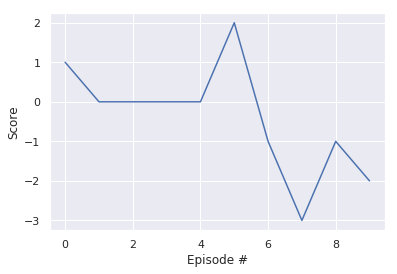

In [22]:
from collections import deque

def dqn(env, agent, n_episodes=2000, max_t=1000, eps_start=1., eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning
    
    Args:
      n_episodes (int): maximum number of training episodes
      max_t (int): maximum number of timesteps per episodes
      eps_start (float): starting value of epsilon, for epsilon-greedy action selection
      eps_end (float): minimum value of epsilon
      eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    progress = tqdm.trange(1, n_episodes + 1)
    for i_episode in progress:
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
                
        scores_window.append(score)
        scores.append(score)
        scores_mean = np.mean(scores_window)
        #print(f'\rEpisode {i_episode}\tAverage Score: {scores_mean:.2f}', end='')
        progress.set_postfix({'episode': i_episode, 'score_mean': scores_mean})
        
        if scores_mean >= 13.:
            print(f'\nEnvironment solved in {i_episode - 100} epsidoes!\nAverage Score: {scores_mean}')
            torch.save(agent.qnetwork_local.state_dict(), 'qnetwork_local_checkpoint.pth')
            break
        
        eps = max(eps_end, eps_decay * eps)
        
    return scores

def plot_scores(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

agent = Agent(state_size=state_size, action_size=num_actions, seed=0, device=torch.device('cuda'))
scores = dqn(env, agent, n_episodes=1)

agent = Agent(state_size=state_size, action_size=num_actions, seed=0, device=torch.device('cpu'))
scores = dqn(env, agent, n_episodes=10)
plot_scores(scores)

  0%|          | 1/1000 [00:00<02:48,  5.94it/s, episode=1, score_mean=0]

QNetwork(
  (fc1): Linear(in_features=37, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


100%|██████████| 1000/1000 [03:42<00:00,  4.44it/s, episode=1000, score_mean=4.72]


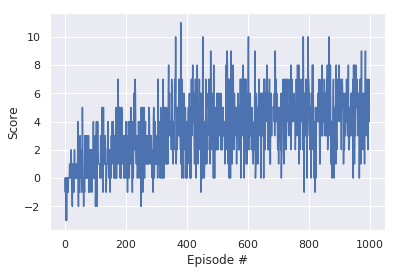

In [37]:
agent = Agent(state_size=state_size, action_size=num_actions, seed=0,
              fc1_units=256, fc2_units=128, device=torch.device('cpu'))
print(agent.qnetwork_local)
scores = dqn(env, agent, n_episodes=1000, max_t=100)
plot_scores(scores)

  0%|          | 0/1000 [00:00<?, ?it/s]

QNetwork(
  (fc1): Linear(in_features=37, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


 51%|█████     | 510/1000 [05:33<05:22,  1.52it/s, episode=511, score_mean=13.1]


Environment solved in 411 epsidoes!
Average Score: 13.12


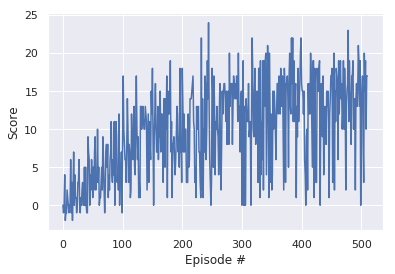

In [38]:
agent = Agent(state_size=state_size, action_size=num_actions, seed=0,
              fc1_units=256, fc2_units=128, device=torch.device('cpu'))
print(agent.qnetwork_local)
scores = dqn(env, agent, n_episodes=1000, max_t=1000)
plot_scores(scores)

  0%|          | 0/100 [00:00<?, ?it/s]

QNetwork(
  (fc1): Linear(in_features=37, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


100%|██████████| 100/100 [01:03<00:00,  1.56it/s, episode=100, score_mean=2.52]


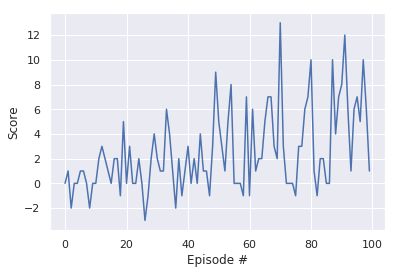

In [23]:
agent = Agent(state_size=state_size, action_size=num_actions, seed=0,
              fc1_units=256, fc2_units=128, device=torch.device('cpu'))
print(agent.qnetwork_local)
scores = dqn(env, agent, n_episodes=100)
plot_scores(scores)

  0%|          | 0/100 [00:00<?, ?it/s]

QNetwork(
  (fc1): Linear(in_features=37, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)


100%|██████████| 100/100 [01:12<00:00,  1.37it/s, episode=100, score_mean=0.65]


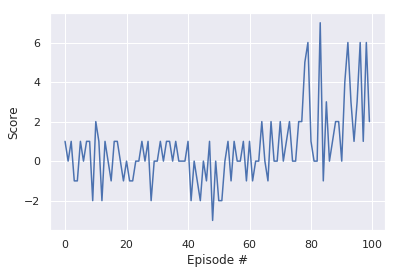

In [24]:
agent = Agent(state_size=state_size, action_size=num_actions, seed=0,
              fc1_units=256, fc2_units=128, device=torch.device('cuda'))
print(agent.qnetwork_local)
scores = dqn(env, agent, n_episodes=100)
plot_scores(scores)

  0%|          | 0/100 [00:00<?, ?it/s]

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


100%|██████████| 100/100 [00:56<00:00,  1.77it/s, episode=100, score_mean=2.59]


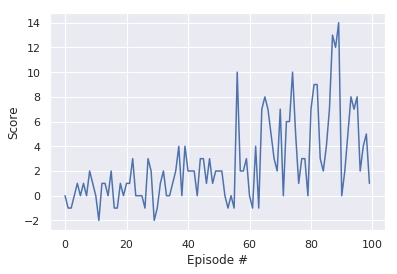

In [25]:
agent = Agent(state_size=state_size, action_size=num_actions, seed=0,
              fc1_units=64, fc2_units=64, device=torch.device('cpu'))
print(agent.qnetwork_local)
scores = dqn(env, agent, n_episodes=100)
plot_scores(scores)

In [20]:
import pandas as pd

df = pd.DataFrame.from_records(list(agent.memory.memory), columns=['s', 'a', 'r', 's_next','done'])
df.head()

,s,a,r,s_next,done
0,"[0.0, 0.0, 1.0, 0.0, 0.12753459811210632, 0.0,...",1,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",False
1,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",False
2,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",False
3,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",False
4,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",1,0.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",False


In [21]:
df['a']

0        1
1        1
2        0
3        1
4        1
5        0
6        1
7        1
8        0
9        1
10       1
11       0
12       1
13       1
14       0
15       1
16       1
17       0
18       1
19       1
20       1
21       0
22       1
23       1
24       0
25       1
26       1
27       0
28       1
29       0
        ..
29970    0
29971    1
29972    1
29973    0
29974    0
29975    1
29976    1
29977    0
29978    0
29979    1
29980    1
29981    0
29982    0
29983    1
29984    1
29985    0
29986    0
29987    1
29988    1
29989    0
29990    0
29991    1
29992    1
29993    0
29994    0
29995    1
29996    1
29997    0
29998    0
29999    0
Name: a, Length: 30000, dtype: int64

In [42]:
class Q(nn.Module):
    
    def __init__(self, state_size, action_size):
        super(Q, self).__init__()
        
        self.fc1 = nn.Linear(state_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, action_size)
        
        self.fc1.weight.data.normal_(std=1/state_size)
        self.fc1.bias.data.zero_()
        self.fc2.weight.data.normal_(std=1/256)
        self.fc2.bias.data.zero_()
        self.fc3.weight.data.normal_(std=1/128)
        self.fc2.bias.data.zero_()
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
    
    def td_target(self, rewards, next_states, dones, gamma):
        device = self.get_device()
        next_states = torch.as_tensor(next_states, dtype=torch.float32).to(device)
        rewards = torch.as_tensor(rewards, dtype=torch.float32).to(device)
        dones = torch.as_tensor(dones.astype(int), dtype=torch.float32).to(device)
        max_q, _ = torch.max(self.forward(next_states), dim=-1, keepdim=True)
        y = rewards + (1 - dones) * gamma * max_q
        return y
        
    def loss(self, states, actions, td_targets):
        device = self.get_device()
        states = torch.as_tensor(states, dtype=torch.float32).to(device)
        actions = torch.as_tensor(actions, dtype=torch.long).to(device)
        q = self.forward(states).gather(1, actions.view(-1, 1))
        loss = F.mse_loss(q, td_targets.to(device))
        return loss
    
    def get_device(self):
        return next(self.parameters()).device
    
    def action_values(self, state):
        state = torch.as_tensor(state, dtype=torch.float32).to(self.get_device())
        values = self.forward(state)
        return values.detach().cpu().numpy()
    
    def pick_action(self, state):
        state = torch.as_tensor(state, dtype=torch.float32).to(self.get_device())
        action = torch.argmax(self.forward(state), dim=-1, keepdim=True)
        return action.detach().cpu().numpy()
    
    def copy(self, other):
        self.load_state_dict(other.state_dict())
    
q = Q(state_size, action_size)
print(q)

env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
action_values = q.action_values(state)
print(action_values)

states = [state, state]
action_values = q.action_values(states)
print(action_values)

q2 = Q(state_size, action_size)
q2.copy(q)
assert np.array_equal(q.fc1.weight.data.detach().numpy(), q2.fc1.weight.data.detach().numpy())

print('=' * 50)

states = np.zeros([2, state_size])
actions = np.zeros([2, 1], dtype=int)
rewards = np.zeros([2, 1])
next_states = np.zeros([2, state_size])
dones = np.full([2, 1], False)

q.to(device)

env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]

for i in range(2):
    action = q.pick_action(state)
    env_info = env.step(action)[brain_name]
    reward = env_info.rewards[0]
    next_state = env_info.vector_observations[0]
    done = env_info.local_done[0]
    states[i] = state
    actions[i] = action
    rewards[i] = reward
    next_states[i] = next_state
    dones[i] = done
    state = next_state

print(states[:, :5])
print(actions)
print(rewards)
print(next_states[:, :5])
print(dones)

optimizer = torch.optim.Adam(q.parameters())
optimizer.zero_grad()
y = q.td_target(rewards, next_states, dones, gamma=1.0)
loss = q.loss(states, actions, y)
loss.backward()
optimizer.step()

Q(
  (fc1): Linear(in_features=37, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=4, bias=True)
)
[ 0.06685083  0.03782009  0.00553394 -0.03237629]
[[ 0.06685083  0.03782009  0.00553394 -0.03237629]
 [ 0.06685083  0.03782009  0.00553394 -0.03237629]]
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
[[0]
 [0]]
[[0.]
 [0.]]
[[0.         0.         0.         1.         0.        ]
 [0.         0.         1.         0.         0.35670558]]
[[False]
 [False]]


In [12]:
def egreedy(state, q_model, epsilon=0.1):
    if np.random.random() >= epsilon:
        return int(np.argmax(q_model.action_values(state)))
    else:
        return np.random.randint(action_size)

q_model = Q(state_size, action_size)
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
action = egreedy(state, q_model, epsilon=0.)
print(action, type(action))
env_info = env.step(action)[brain_name]

0 <class 'int'>


In [13]:
class ReplayMemory:
    def __init__(self, state_shape, action_shape, capacity=2**20):
        self.capacity = capacity
        self.states = np.zeros([capacity, *state_shape])
        self.actions = np.zeros([capacity, *action_shape], dtype=int)
        self.rewards = np.zeros([capacity, 1])
        self.next_states = np.zeros([capacity, *state_shape])
        self.dones = np.full([capacity, 1], False)
        self.cursor = 0
        self.full = False
        
    def store(self, state, action, reward, next_state, done):
        self.states[self.cursor] = state
        self.actions[self.cursor] = action
        self.rewards[self.cursor] = reward
        self.next_states[self.cursor] = next_state
        self.dones[self.cursor] = done
        self.cursor = (self.cursor + 1) % self.capacity
        if not self.full and self.cursor == 0:
            self.full = True
            
    def sample(self, n_samples):
        if not self.full and self.cursor < n_samples:
            return [], [], [], [], []
        
        end_index = self.cursor if not self.full else self.capacity
        samples = np.random.choice(end_index, size=n_samples)
        return (
            self.states[samples],
            self.actions[samples],
            self.rewards[samples],
            self.next_states[samples],
            self.dones[samples])

q = Q(state_size, action_size)
replay = ReplayMemory([state_size], [1], capacity=5)
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]

for _ in range(8):
    action = egreedy(state, q, epsilon=0.)
    env_info = env.step(action)[brain_name]
    reward = env_info.rewards[0]
    next_state = env_info.vector_observations[0]
    done = env_info.local_done[0]
    replay.store(state, action, reward, next_state, done)
    state = next_state
    
samples = replay.sample(1)
print("samples:\n", samples)

print("states:\n", replay.states[:2, :5])
print("next_states:\n", replay.next_states[:2, :5])

samples:
 (array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.97567415e-01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.71893001e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.21931839e-01, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.09156588e-01,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.05856907e-01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.39805841e-01, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.63989139e-01, 4.76837158e-07,
        1.16585569e+01]]), array([[0]]), array([[0.]]), array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.65226740e-01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.46574378e-01, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.09724241e-01, 1.00000000e+0

### TODO

  * target update interval
  * step skip interval
  * epsilon annealing

In [44]:
import sys

def train(env, num_episodes=1, alpha=1e-4, batch_size=32,
          epsilon=0.1, gamma=.99,
          target_update_interval=10**4,
          episode_scores=None,
          device=None):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
    target_model = Q(state_size, action_size)
    behavior_model = Q(state_size, action_size).to(device)
    behavior_model.copy(target_model)
    target_model.eval()
    
    optimizer = torch.optim.Adam(behavior_model.parameters(), lr=alpha)

    def policy(state):
        return egreedy(state, behavior_model, epsilon)
    
    replay = ReplayMemory([state_size], [1])
    i_step = 0
    
    for i_episode in tqdm.trange(num_episodes, ncols=50):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        done = env_info.local_done[0]
        score = 0
        
        while not done:
            action = policy(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            replay.store(state, action, reward, next_state, done)
            states, actions, rewards, next_states, dones = replay.sample(batch_size)
            if len(states) > 0:
                y = target_model.td_target(rewards, next_states, dones, gamma)
                behavior_model.train()
                optimizer.zero_grad()
                loss = behavior_model.loss(states, actions, y)
                loss.backward()
                optimizer.step()
                behavior_model.eval()
                
                if (i_step + 1) % target_update_interval == 0:
                    target_model.copy(behavior_model)
                i_step += 1

            score += reward
            state = next_state
        
        if episode_scores is not None:
            episode_scores.append(score)
        #sys.stdout.write('\rEpisode {}/{} Score: {}'.format(i_episode+1, num_episodes, score))
    #sys.stdout.write('\n')
    
    return target_model


for device1 in [torch.device('cuda'), torch.device('cpu')]:
    episode_scores = []
    train(env, num_episodes=10, batch_size=32, target_update_interval=5, episode_scores=episode_scores,
          device=device1)
    print(episode_scores)

100%|█████████████| 10/10 [00:50<00:00,  5.06s/it]


[0.0, 1.0, 4.0, 5.0, 3.0, 3.0, 1.0, 5.0, 8.0, 2.0]


100%|█████████████| 10/10 [00:23<00:00,  2.41s/it]


[1.0, 0.0, -1.0, 0.0, -1.0, 1.0, 3.0, 3.0, 4.0, 2.0]


In [ ]:
episode_scores = []
q_model = train(env, num_episodes=1000, batch_size=32, target_update_interval=100,
                episode_scores=episode_scores, device=torch.device('cpu'))

plt.plot(episode_scores)
plt.xlabel('episode')
plt.ylabel('score')
plt.title('Episode Score')
plt.show()


  8%|▊          | 76/1000 [02:46<31:38,  2.05s/it]

In [ ]:
%matplotlib inline
plt.plot(episode_scores)
plt.xlabel('episode')
plt.ylabel('score')
plt.title('Episode Score')
plt.show()

In [ ]:
torch.from_numpy(np.random.random([1, state_size]))

In [ ]:
random_state = torch.from_numpy(np.random.random([1, state_size])).float()
q_model.forward(random_state)

In [ ]:
aa = np.arange(10)
ii = np.array([1,3,9])
aa[ii]

In [ ]:
aa

In [ ]:
torch.rand(1, 3).size()

In [33]:
aa = np.array([True, False, True]).astype(int)
aa

array([1, 0, 1])

In [34]:
(np.logical_not(aa)) * np.array([1, 2, 3])

array([0, 2, 0])

In [18]:
torch.cuda.

1